In [1]:
# To reload external files automatically (ex: utils)
%load_ext autoreload
%autoreload 2

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import proplot as plot # New plot library (https://proplot.readthedocs.io/en/latest/)
from scipy import stats
import xesmf as xe # For regridding (https://xesmf.readthedocs.io/en/latest/)

import sys
sys.path.insert(1, '../../') # to include my util file in previous directory
import utils as u # my personal functions
u.check_python_version()
u.check_virtual_memory()

%matplotlib notebook

3.7.6 (default, Jan  8 2020, 19:59:22) 
[GCC 7.3.0]
Virtual memory usage - total: 126 GB / available: 110 GB / percent used: 12.0 %


In [2]:
cru_path = '/bdd/cru/cru_ts_4.00/data/tmp'

In [3]:
ds_cru = xr.open_dataset(cru_path+'/'+'cru_ts4.00.1901.1910.tmp.dat.nc')
ds_cru

<xarray.Dataset>
Dimensions:  (lat: 360, lon: 720, time: 120)
Coordinates:
  * lon      (lon) float32 -179.75 -179.25 -178.75 ... 178.75 179.25 179.75
  * lat      (lat) float32 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * time     (time) datetime64[ns] 1901-01-16 1901-02-15 ... 1910-12-16
Data variables:
    tmp      (time, lat, lon) float32 ...
    stn      (time, lat, lon) int32 ...
Attributes:
    Conventions:  CF-1.4
    title:        CRU TS4.00 Mean Temperature
    institution:  Data held at British Atmospheric Data Centre, RAL, UK.
    source:       Run ID = 1701270849. Data generated from:tmp.1701161043.dtb
    history:      Fri 27 Jan 2017 10:16:26 GMT : User ianharris : Program mak...
    references:   Information on the data is available at http://badc.nerc.ac...
    comment:      Access to these data is available to any registered CEDA user.
    contact:      BADC <badc@rl.ac.uk>

<IPython.core.display.Javascript object>


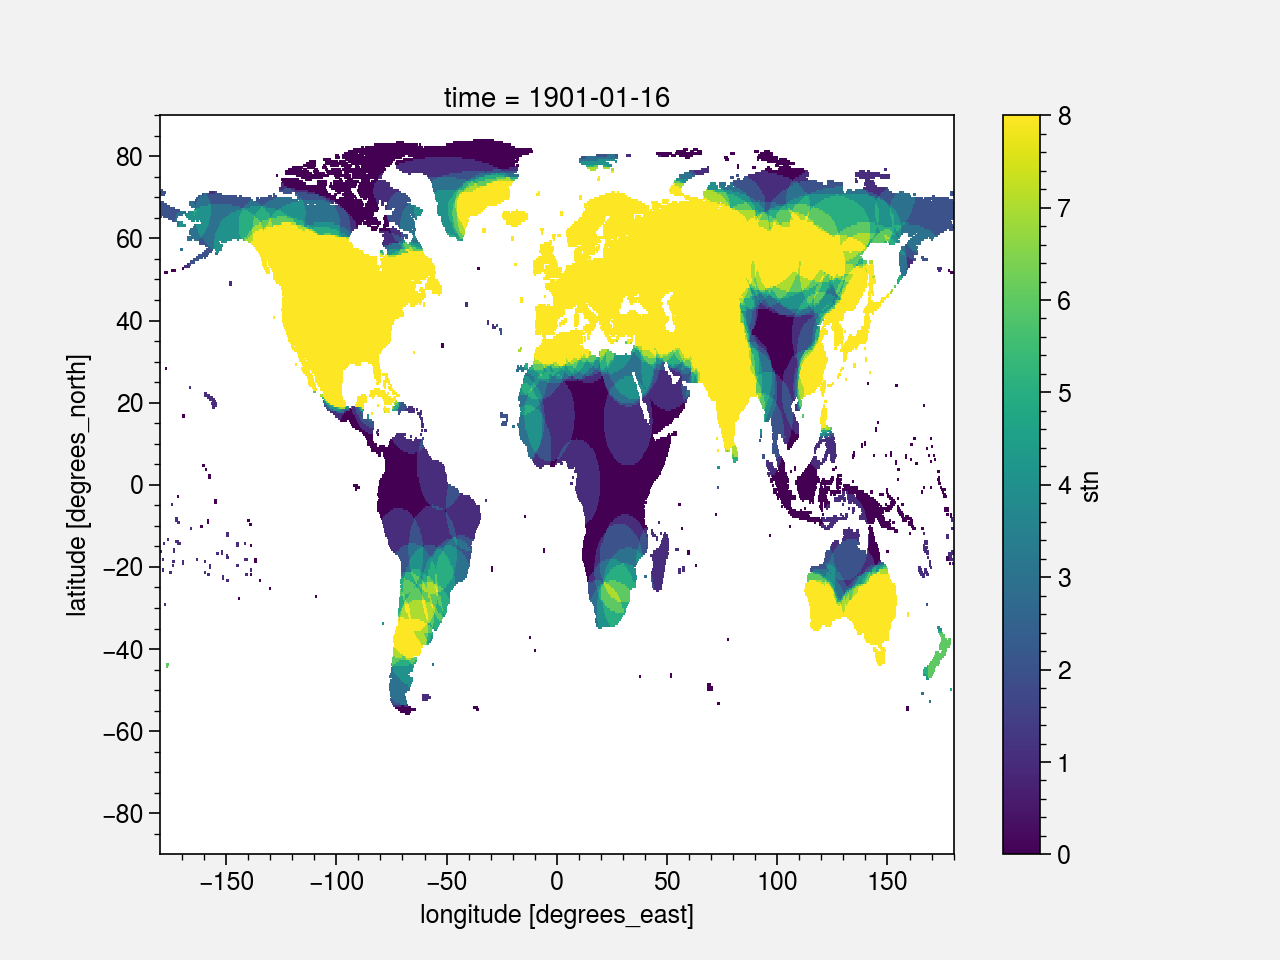

In [4]:
plt.figure()
ds_cru.stn[0].where(ds_cru.stn[0] >= 0).plot()

<IPython.core.display.Javascript object>


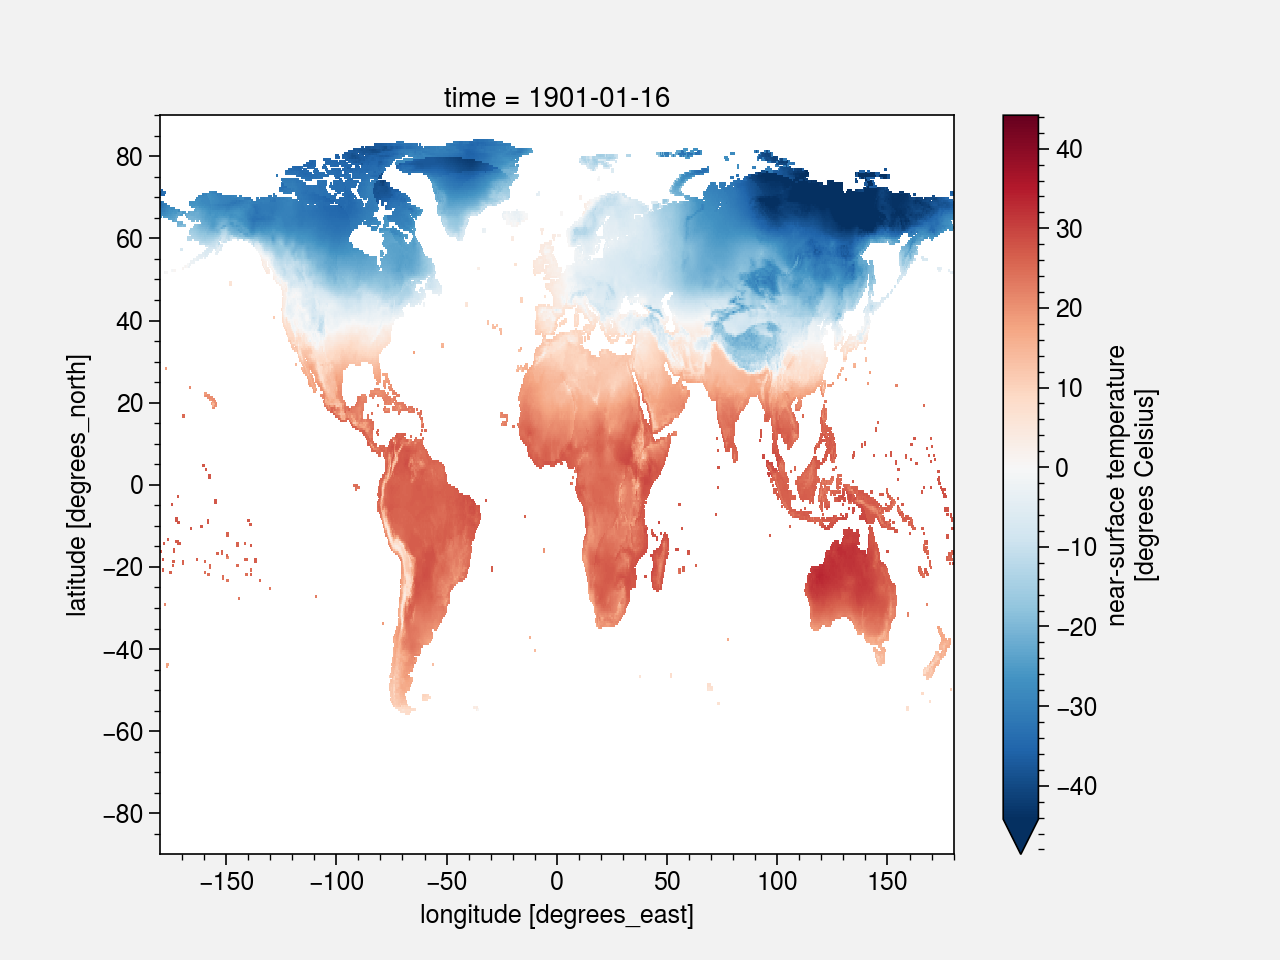

In [6]:
plt.figure()
ds_cru.tmp[0].plot(robust=True)

In [23]:
ds_cru.sel(time=slice('1901','1902'))

<xarray.Dataset>
Dimensions:  (lat: 360, lon: 720, time: 24)
Coordinates:
  * lon      (lon) float32 -179.75 -179.25 -178.75 ... 178.75 179.25 179.75
  * lat      (lat) float32 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * time     (time) datetime64[ns] 1901-01-16 1901-02-15 ... 1902-12-16
Data variables:
    tmp      (time, lat, lon) float32 ...
    stn      (time, lat, lon) int32 ...
Attributes:
    Conventions:  CF-1.4
    title:        CRU TS4.00 Mean Temperature
    institution:  Data held at British Atmospheric Data Centre, RAL, UK.
    source:       Run ID = 1701270849. Data generated from:tmp.1701161043.dtb
    history:      Fri 27 Jan 2017 10:16:26 GMT : User ianharris : Program mak...
    references:   Information on the data is available at http://badc.nerc.ac...
    comment:      Access to these data is available to any registered CEDA user.
    contact:      BADC <badc@rl.ac.uk>

<IPython.core.display.Javascript object>


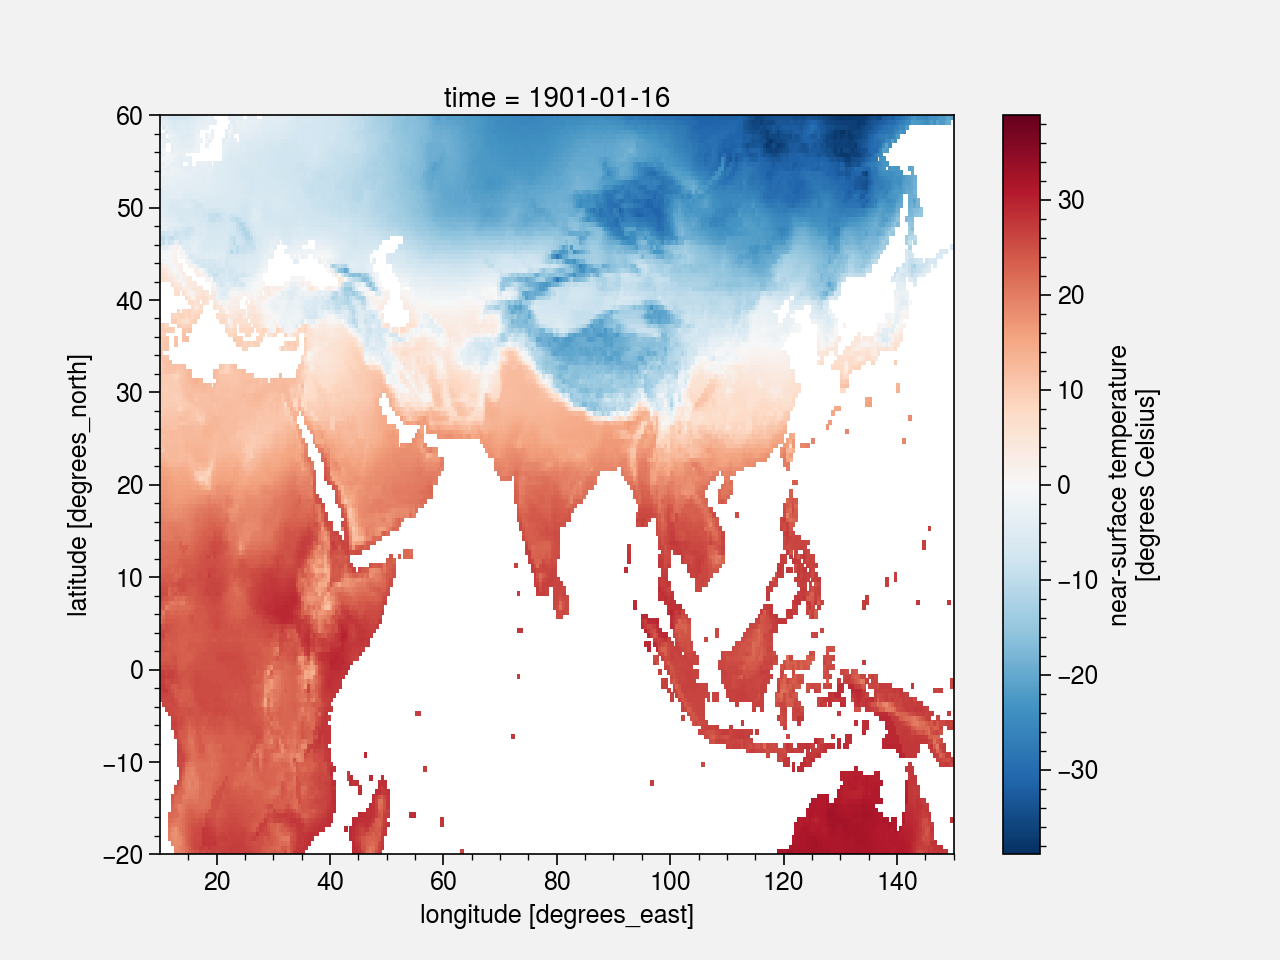

In [21]:
plt.figure()
ds_cru.sel(lon=slice(10,150), lat=slice(-20,60)).isel(time=0).tmp.plot()